# Condensed Nearest Neighbours (CNN)

Đặt tất cả các quan sát trong lớp thiểu số vào một nhóm, thường được gọi là nhóm O.

Thêm 1 mẫu (ngẫu nhiên) từ lớp đa số vào nhóm O.

Huấn luyện một mô hình KNN với nhóm O.

Lấy một mẫu từ lớp đa số mà chưa có trong nhóm O.

Dự đoán lớp của mẫu đó bằng KNN từ bước 3.

Nếu dự đoán đúng, quay lại bước 4 và lặp lại.

Nếu dự đoán sai, thêm mẫu đó vào nhóm O, quay lại bước 3 và lặp lại.

Tiếp tục cho đến khi tất cả các mẫu của lớp đa số đã được gán vào nhóm O hoặc bị bỏ qua.

Phiên bản cuối cùng của nhóm O chính là bộ dữ liệu được áp dụng undersampling.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import CondensedNearestNeighbour

## Create data


In [2]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

0    983
1     17
dtype: int64


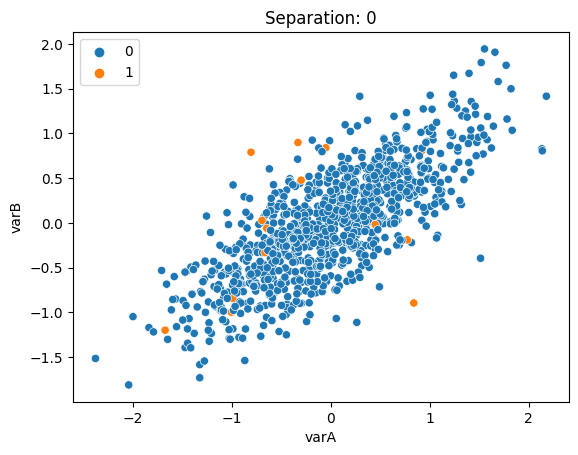

0    983
1     17
dtype: int64


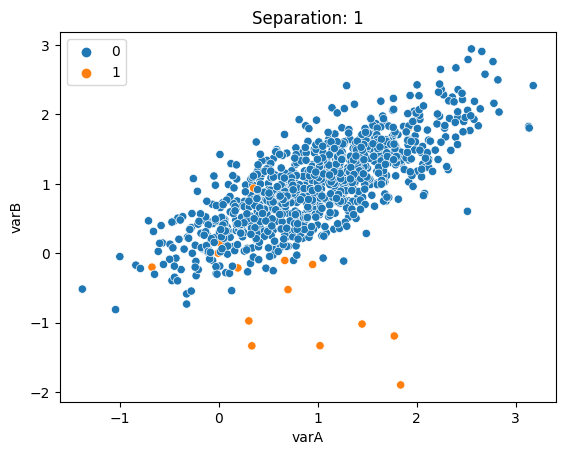

0    983
1     17
dtype: int64


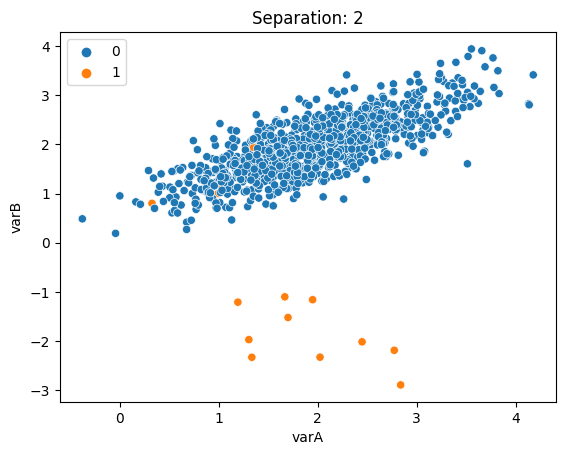

In [3]:
# make datasets with different class separateness
# and plot

for sep in [0, 1, 2]:
    
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )
    
    plt.title('Separation: {}'.format(sep))
    plt.show()

## Undersample with Condensed Nearest Neighbours


[CondensedNearestNeighbour](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.CondensedNearestNeighbour.html)




In [4]:
# create data

X, y = make_data(sep=2)

# set up condensed nearest neighbour transformer

cnn = CondensedNearestNeighbour(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,# default
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = cnn.fit_resample(X, y)

In [5]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((70, 2), (70,))

In [7]:
# number of minority class observations

y.value_counts()

0    983
1     17
dtype: int64

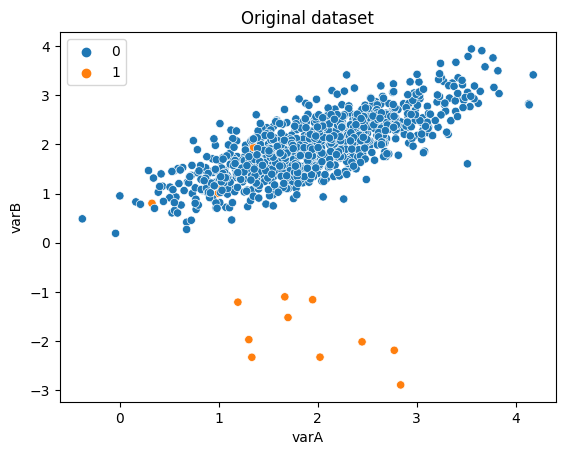

In [8]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

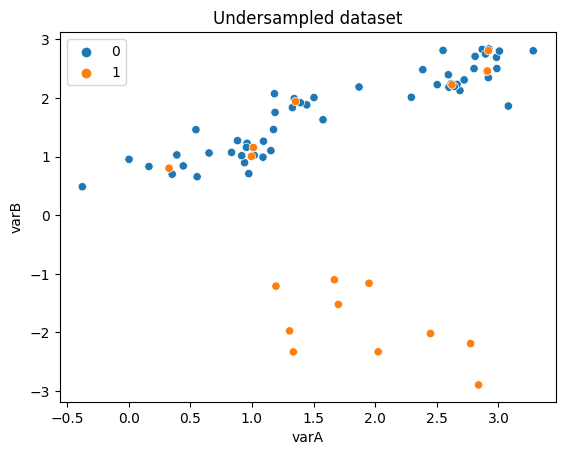

In [9]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

In [10]:
# create data
X, y = make_data(sep=0.5)

cnn = CondensedNearestNeighbour(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = cnn.fit_resample(X, y)

In [11]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# undersampled data

X_resampled.shape, y_resampled.shape

((101, 2), (101,))

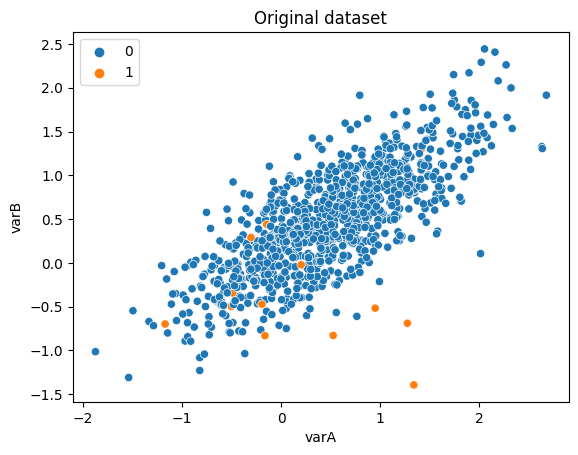

In [13]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

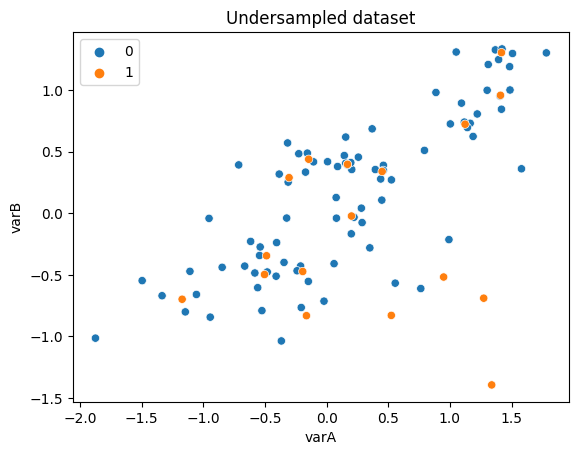

In [14]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()